## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **EXPLORATORY DATA ANALYSIS INVOLVED**

>







# **IMPORT OF LIBRARIES AND KNOW  YOUR DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mp
                            


In [ ]:
# load google app review data into dataframe
df = pd.read_csv("/content/drive/MyDrive/Play Store Data.csv")
dfr = pd.read_csv("/content/drive/MyDrive/User Reviews.csv")


In [ ]:
# df.head() will provide us with first five recods of the given data i.e,index(0-4)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# df.tail() provide us five records data from end 
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# Quick information about the google app review data about non null count and data type in column name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# it gives data about count, mean  
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
# look for the random 10 records
df.sample(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10356,Curso Básico y Avanzado la Fe de Jesús Audio-T...,FAMILY,NaN,0,11M,10+,Free,0,Everyone 10+,Education,"July 12, 2018",1.0,4.0 and up
9824,Economic Times : Market News,NEWS_AND_MAGAZINES,4.3,93708,Varies with device,"5,000,000+",Free,0,Everyone,News & Magazines,"July 9, 2018",Varies with device,Varies with device
8587,DN Reader,NEWS_AND_MAGAZINES,4.6,18,1.8M,100+,Free,0,Everyone,News & Magazines,"March 13, 2014",1.0,4.0 and up
4602,"Truecaller: Caller ID, SMS spam blocking & Dialer",COMMUNICATION,4.5,7820775,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
4002,C Offline Tutorial,BOOKS_AND_REFERENCE,4.7,88,4.2M,"1,000+",Free,0,Everyone,Books & Reference,"December 8, 2017",1.0.1,4.1 and up
513,OurTime Dating for Singles 50+,DATING,3.4,2519,5.0M,"100,000+",Free,0,Mature 17+,Dating,"July 25, 2018",1.9.7,4.4 and up
2958,"Meitu – Beauty Cam, Easy Photo Editor",PHOTOGRAPHY,4.5,462702,45M,"10,000,000+",Free,0,Everyone,Photography,"August 1, 2018",8.1.0.6,4.3 and up
6441,BL Taxi,MAPS_AND_NAVIGATION,4.9,124,3.4M,"1,000+",Free,0,Everyone,Maps & Navigation,"March 26, 2018",Varies with device,Varies with device
6396,Bk Usha behn,LIFESTYLE,5.0,10,3.0M,"1,000+",Free,0,Everyone,Lifestyle,"January 14, 2018",1.0,4.1 and up
2620,Frontback - Social Photos,SOCIAL,3.8,19446,Varies with device,"1,000,000+",Free,0,Mature 17+,Social,"December 1, 2017",3.4.5,4.0.3 and up


In [48]:
# for finding what are the types of Category
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
# this gives us about the type of apps available on google apps 
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
# for finding the  type of content rating
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
df['Rating'].mode()


0    4.4
dtype: float64

In [ ]:
df['Rating'].median()

4.3

#**DATA CLEANING** 

In [ ]:

# data cleaning of size columm

val = df[df['Size'] == '1,000+'].index
df.drop(axis=0, inplace=True, index=val)


sizes = [i for i in df['Size']]

cleaned_data=[]
def fix_size(sizes_list):
 for size in sizes_list:

    if 'M' in size:

      size=size.replace('M','')
      size = float(size)

    elif 'k' in size:
      size=size.replace('k','')
      size = float(size)
      size = size/1024



    elif  'Varies with device' in size:
      size=float(0) 

    cleaned_data.append(size)  
 return cleaned_data
df['Size'] = fix_size(sizes)
df['Size'] = df['Size'].astype(float)
       



In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
# Review data cleaning
rev= [i for i in df['Reviews']]

def fix_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for rev in reviews_list:
        if 'M' in rev:
            rev = rev.replace('M', '')
            rev = float(rev) * 1000000  # 1M = 1,000,000
        cleaned_data.append(rev)
    return cleaned_data

df['Reviews'] = fix_reviews(rev)
df['Reviews'] = df['Reviews'].astype(float)


In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
df['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
# cleaning of price
price = [i for i in df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

df['Price'] = clean_prices(price)
df['Price'] = df['Price'].astype(float)


In [ ]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7543,CM Transfer - Share any files with friends nearby,COMMUNICATION,4.6,71740.0,5.8,"5,000,000+",Free,0.0,Everyone,Communication,"June 27, 2018",2.0.7.0014,4.0 and up
10069,Rejoin Your Ex,SOCIAL,NaN,0.0,29.0,100+,Free,0.0,Everyone,Social,"May 26, 2015",2.0,2.3.3 and up
513,OurTime Dating for Singles 50+,DATING,3.4,2519.0,5.0,"100,000+",Free,0.0,Mature 17+,Dating,"July 25, 2018",1.9.7,4.4 and up
3928,YouTube,VIDEO_PLAYERS,4.3,25623548.0,0.0,"1,000,000,000+",Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
8842,DS - xR,BUSINESS,NaN,2.0,1.4,10+,Free,0.0,Everyone,Business,"November 21, 2017",1.0,4.4 and up
7006,"3D Color by Number: Voxel, Unicorn, Pixel Art 3D",FAMILY,4.3,2017.0,0.0,"100,000+",Free,0.0,Everyone,Entertainment,"February 16, 2018",2.4,4.1 and up
4514,Q-Ticketing,MAPS_AND_NAVIGATION,3.8,114.0,19.0,"10,000+",Free,0.0,Everyone,Maps & Navigation,"December 18, 2017",1.8.3111,4.3 and up
2004,Score! Hero,GAME,4.6,5419676.0,96.0,"100,000,000+",Free,0.0,Everyone,Sports,"June 13, 2018",1.751,4.4 and up
1284,BetterMe: Weight Loss Workouts,HEALTH_AND_FITNESS,4.2,14709.0,15.0,"5,000,000+",Free,0.0,Everyone,Health & Fitness,"July 26, 2018",2.8.2,5.0 and up
1050,Citibanamex Movil,FINANCE,3.6,52306.0,42.0,"5,000,000+",Free,0.0,Everyone,Finance,"July 27, 2018",20.1.0,5.0 and up


In [ ]:
#cleaning of Install data 

installs = [i for i in df['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
df['Installs'] = clean_installs(installs)
df['Installs'] = df['Installs'].astype(float)

In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
total1=  df.groupby("Category")['Type'].agg("count").reset_index()
total1

,Category,Type
0,ART_AND_DESIGN,65
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,231
4,BUSINESS,460
5,COMICS,60
6,COMMUNICATION,387
7,DATING,234
8,EDUCATION,156
9,ENTERTAINMENT,149


In [ ]:
# Remove the record where "Type" is null:
index= df[df['Type'].isna()].index

df.drop(axis = 0, inplace = True,index=index)


In [ ]:
# REMOVE THE RECORD WHERE "TYPE" IS "O" BY USING DROP FUNCTION
for x in df.index:
  if df.loc[x, "Type"] == "0":
    df.drop(x, inplace = True)

  

In [ ]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
# check for null values , isna() detects missing values and return boolean values
df.isna().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
df["Rating"].fillna(4.1,inplace = True)


In [ ]:
#df.drop(axis =0,index =10472 ,inplace=True)

In [ ]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
df.dropna(subset = ['Content Rating'], inplace = True)

In [ ]:
print(df['Content Rating'].agg('count'))

10839


In [ ]:
print(df['Content Rating'].unique())

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


# **DATA VISUALIZATION**

#21. PLOTTING OF POSITIVE REVIEWS

In [ ]:

positive_reviews_df = dfr[dfr['Sentiment'] == 'Positive']
positive_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


Text(0.5, 1.0, 'Apps with the highest number of positive reviews')

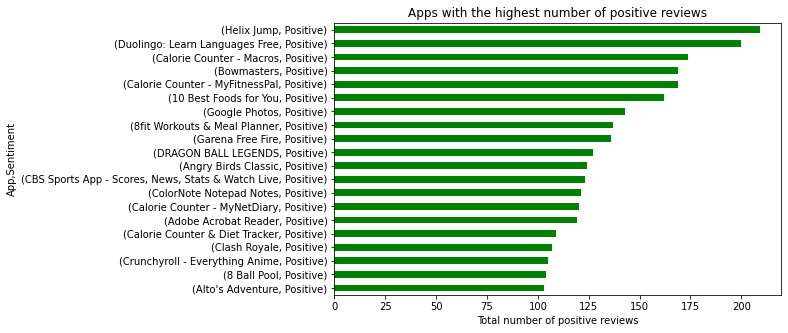

In [ ]:

positive_reviews_df.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(8,5), color='green').invert_yaxis()
plt.xlabel('Total number of positive reviews')
plt.title('Apps with the highest number of positive reviews')

# 22. WORD CLOUD FOR POSITIVE REVIEWS

In [ ]:
from wordcloud import WordCloud, STOPWORDS

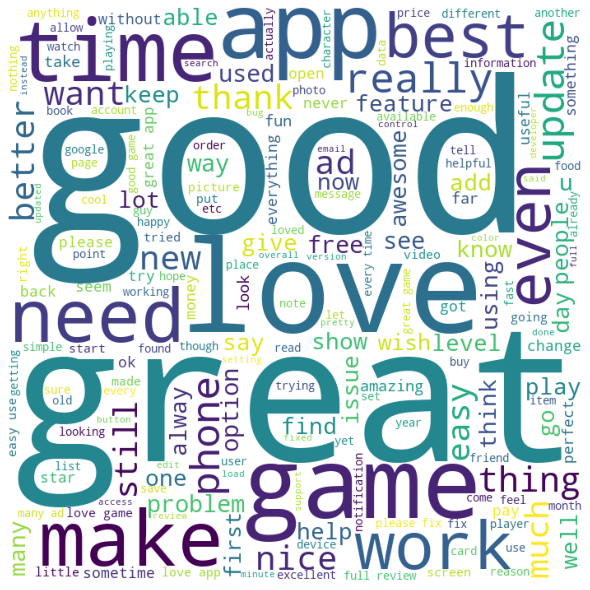

In [ ]:
review_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in positive_reviews_df.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    review_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# 23. PLOTTING OF NEGATIVE REVIEWS

In [ ]:
negative_reviews_df = dfr[dfr['Sentiment'] == 'Negative']
negative_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


Text(0.5, 1.0, 'Apps with the highest number of negative reviews')

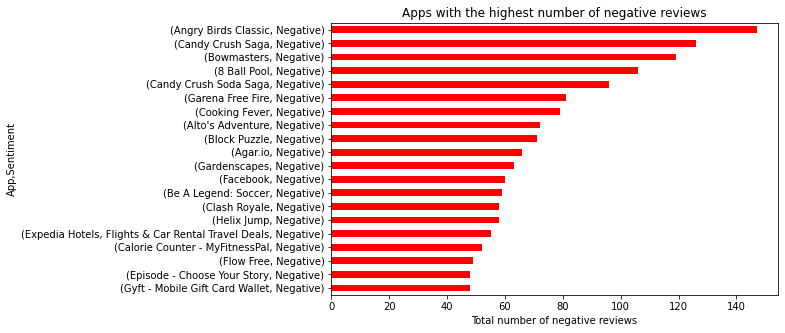

In [ ]:
#plotting of negative reviews
negative_reviews_df.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(8,5), color='red').invert_yaxis()
plt.xlabel('Total number of negative reviews')
plt.title('Apps with the highest number of negative reviews')

# 24. WORD CLOUD OF NEGATIVE REVIEWS


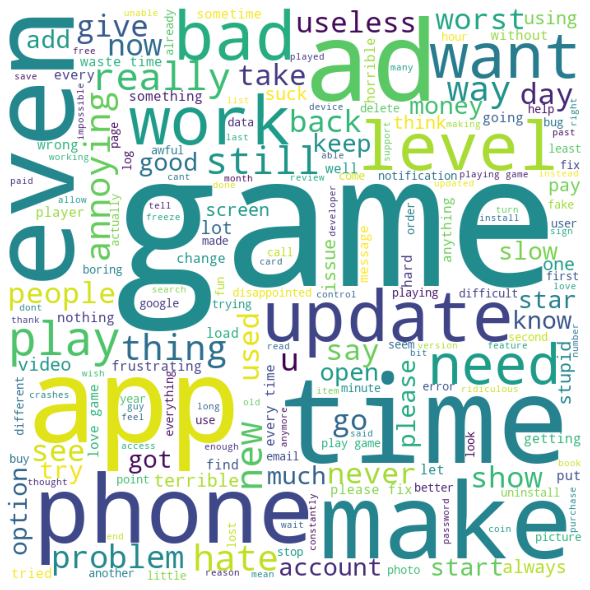

In [ ]:
review_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in negative_reviews_df.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    review_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# 25. CORELATION BETWEEN RATING,REVIEWS,SIZE AND INSTALLS

In [ ]:
df.loc[0:10842,['Size','Installs']]

,Size,Installs
0,19.0,10000.0
1,14.0,500000.0
2,8.7,5000000.0
3,25.0,50000000.0
4,2.8,100000.0
...,...,...
10836,53.0,5000.0
10837,3.6,100.0
10838,9.5,1000.0
10839,0.0,1000.0


In [ ]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.071814,0.049988,0.055835,-0.020835
Reviews,0.071814,1.000000,0.065450,0.643121,-0.009668
Size,0.049988,0.065450,1.000000,-0.003468,-0.013464
Installs,0.055835,0.643121,-0.003468,1.000000,-0.011691
Price,-0.020835,-0.009668,-0.013464,-0.011691,1.000000


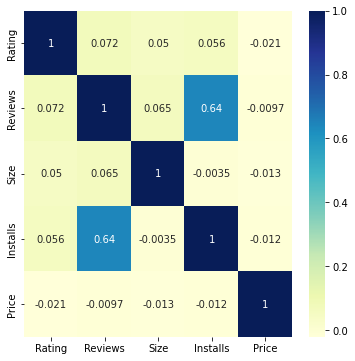

In [ ]:
plt.figure(figsize = (6,6))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
dfy=df.groupby(['Category'])['Rating'].mean()
dfy

Category
ART_AND_DESIGN         4.346154
AUTO_AND_VEHICLES      4.177647
BEAUTY                 4.241509
BOOKS_AND_REFERENCE    4.289610
BUSINESS               4.114130
COMICS                 4.153333
COMMUNICATION          4.149612
DATING                 3.992308
EDUCATION              4.387179
ENTERTAINMENT          4.126174
EVENTS                 4.335938
FAMILY                 4.181786
FINANCE                4.128142
FOOD_AND_DRINK         4.157480
GAME                   4.278671
HEALTH_AND_FITNESS     4.254252
HOUSE_AND_HOME         4.184091
LIBRARIES_AND_DEMO     4.160000
LIFESTYLE              4.095812
MAPS_AND_NAVIGATION    4.056204
MEDICAL                4.167387
NEWS_AND_MAGAZINES     4.126502
PARENTING              4.266667
PERSONALIZATION        4.289031
PHOTOGRAPHY            4.187164
PRODUCTIVITY           4.192217
SHOPPING               4.246154
SOCIAL                 4.236610
SPORTS                 4.202604
TOOLS                  4.054211
TRAVEL_AND_LOCAL       4.108140